# ***Parâmetros:*** 

In [ ]:
mt = 150                #Massa do conjunto humano + acessorios
M =  5.972e24          #Massa da Terra
G = 6.67e-11           #Constante de gravitação universal
R = 6371000             #Raio da Terra
po = 1              #Densidade ao nível do mar
ho = 7700               #Constante de decaimento exponencial

# ***Implementação:*** 

**Modelo - Abstração:**

![image.png](attachment:e1fca5a8-9524-4733-9052-3c5588ce5f2b.png)
![image.png](attachment:5c5383ea-1367-41e3-8b80-0f57b5327238.png)

**Modelo - Diagrama de corpo livre:**

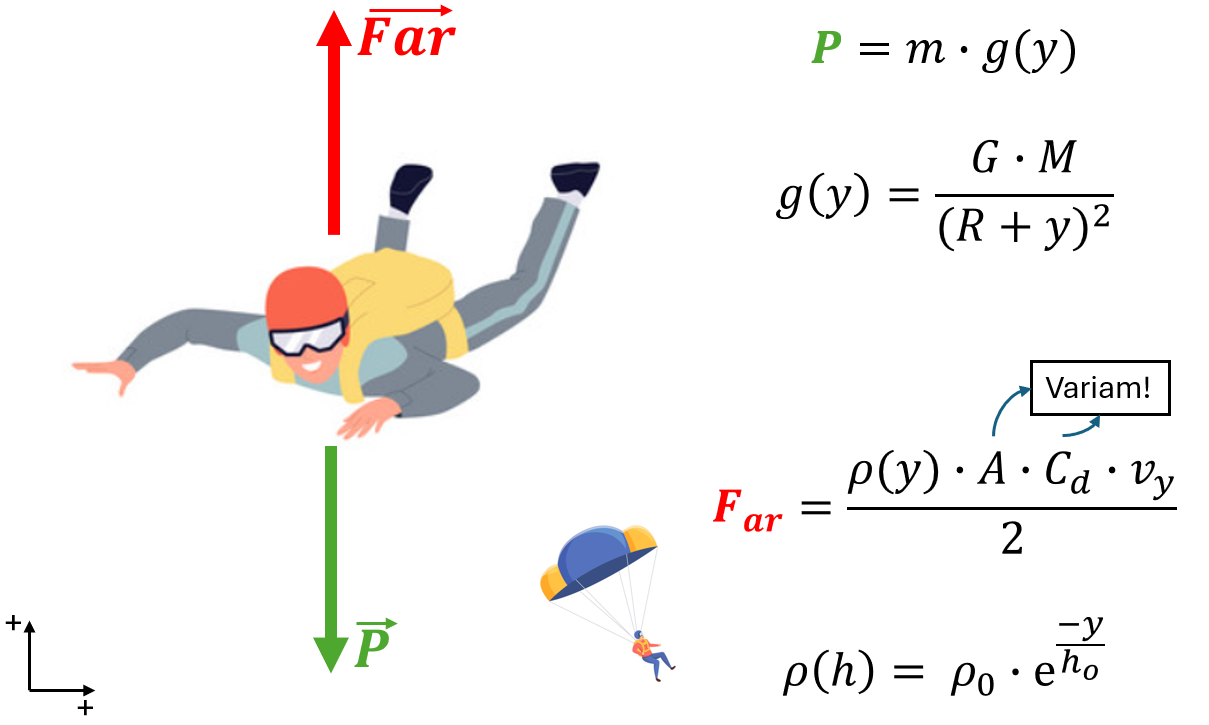
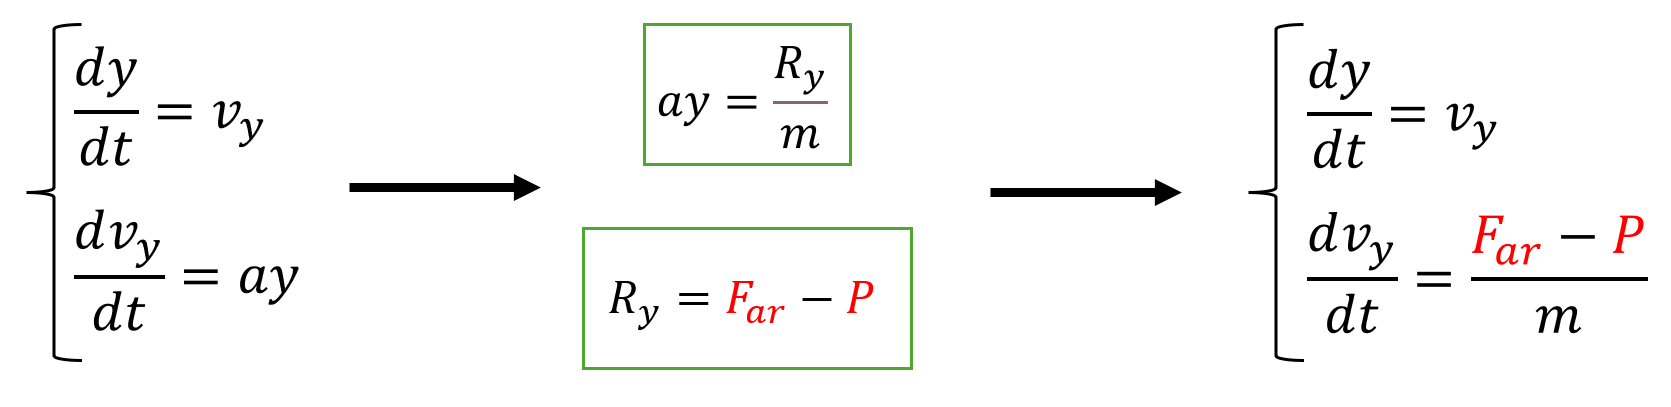

**Funções:**

In [ ]:
import pandas
from math import*
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def modelo1(Y, t):
    y = Y[0]
    vy = Y[1]
    if y >= 3500: 
        A = 0.5     #Área de uma pessoa com os braços abertos
        Cd= 1.2      #Coeficiente de arrasto do ar para uma pessoa em queda livre
    else:            #Após a abertura do paraquedas
        A = 20       #Área do paraquedas aberto 
        Cd= 2        #Coeficiente de arrasto do ar para o paraquedas
    p = po*(e**(-y/ho))
    dydt = vy
    dvydt = (p*Cd*A*(vy**2))/(2*mt) - (G*M/((R+y)**2))
    L = [dydt, dvydt]
    return L

def modelo2(Y, t):
    y = Y[0]
    vy = Y[1]
    if t <= 260: 
        A = 0.57     #Área de uma pessoa com os braços abertos
        Cd= 1.2      #Coeficiente de arrasto do ar para uma pessoa em queda livre
    else:            #Após a abertura do paraquedas
        A = 20       #Área do paraquedas aberto 
        Cd= 2        #Coeficiente de arrasto do ar para o paraquedas
    p = po*(e**(-y/ho))
    dydt = vy
    dvydt = (p*Cd*A*(vy**2))/(2*mt) - (G*M/((R+y)**2))
    L = [dydt, dvydt]
    return L

**Código de implementação - Altura x tempo e Velocidade x tempo**

In [ ]:
y0 = 38969           #Altura inicial do humano (m)
v0 = 0               #Velocidade inicial (m/s)
Y0 = [y0, v0]        # Condicoes iniciais

dt = 1
tf = 544
lista_t = np.arange(0, tf, dt)

q = odeint(modelo1, Y0, lista_t)
y_lista = q[:,0]
u = odeint(modelo2, Y0, lista_t)
vy_lista = abs(u[:,1])

**Gráficos de implementação**

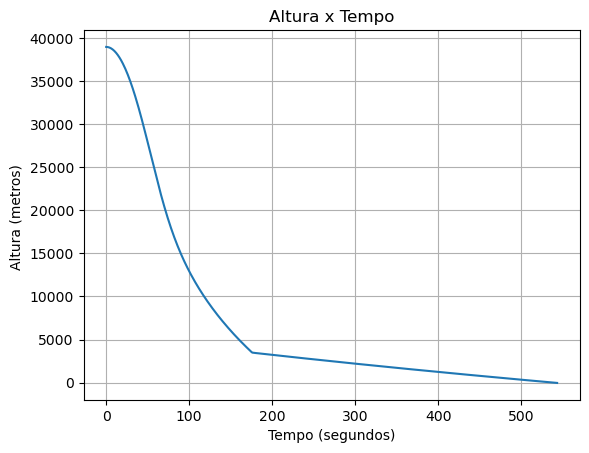

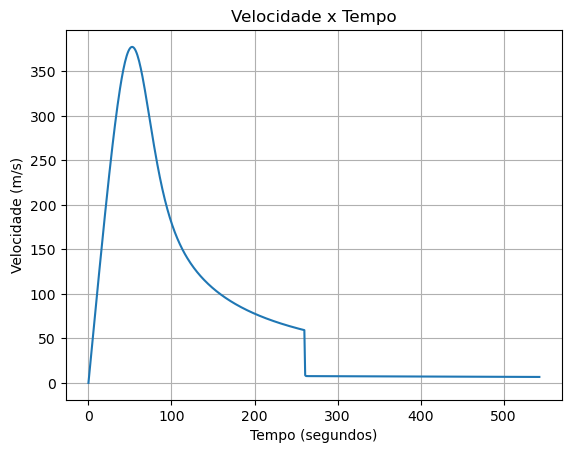

In [ ]:
plt.plot(lista_t, y_lista)
plt.title("Altura x Tempo")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Altura (metros) ")
plt.grid()
plt.show()

plt.plot(lista_t, vy_lista)
plt.title("Velocidade x Tempo")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Velocidade (m/s)")
plt.grid()
plt.show()

# ***Validação:***

**Dados reais:**

In [ ]:
#Dados retirados do vídeo:
lista_altura = [38969.0, 38935.2, 38901.4, 38867.6, 38833.8, 38800.0, 38720.0, 38640.0, 38560.0, 38480.0, 38400.0, 38260.0, 38120.0, 37980.0, 37840.0, 37700.0, 37560.0, 37420.0, 37280.0, 37140.0, 37000.0, 36750.0, 36500.0, 36250.0, 36000.0, 35750.0, 35500.0, 35250.0, 35000.0, 34750.0, 34500.0, 34200.0, 33900.0, 33600.0, 33300.0, 33000.0, 32700.0, 32400.0, 32100.0, 31800.0, 31500.0, 31150.0, 30800.0, 30450.0, 30100.0, 29750.0, 29400.0, 29050.0, 28700.0, 28350.0, 28000.0, 27600.0, 27200.0, 26800.0, 26400.0, 26000.0, 25600.0, 25200.0, 24800.0, 24400.0, 24000.0, 23650.0, 23300.0, 22950.0, 22600.0, 22250.0, 21900.0, 21550.0, 21200.0, 20850.0, 20500.0, 20200.0, 19900.0, 19600.0, 19300.0, 19000.0, 18700.0, 18400.0, 18100.0, 17800.0, 17500.0, 17250.0, 17000.0, 16750.0, 16500.0, 16250.0, 16000.0, 15750.0, 15500.0, 15250.0, 15000.0, 14800.0, 14600.0, 14400.0, 14200.0, 14000.0, 13800.0, 13600.0, 13400.0, 13200.0, 13000.0, 12800.0, 12600.0, 12400.0, 12200.0, 12000.0, 11800.0, 11600.0, 11400.0, 11200.0, 11000.0, 10800.0, 10600.0, 10400.0, 10200.0, 10000.0, 9800.0, 9600.0, 9400.0, 9200.0, 9000.0, 8900.0, 8800.0, 8700.0, 8600.0, 8500.0, 8400.0, 8300.0, 8200.0, 8100.0, 8000.0, 7900.0, 7800.0, 7700.0, 7600.0, 7500.0, 7400.0, 7300.0, 7200.0, 7100.0, 7000.0, 6900.0, 6800.0, 6700.0, 6600.0, 6500.0, 6400.0, 6300.0, 6200.0, 6100.0, 6000.0, 5950.0, 5900.0, 5850.0, 5800.0, 5750.0, 5700.0, 5650.0, 5600.0, 5550.0, 5500.0, 5450.0, 5400.0, 5350.0, 5300.0, 5250.0, 5200.0, 5150.0, 5100.0, 5050.0, 5000.0, 4950.0, 4900.0, 4850.0, 4800.0, 4750.0, 4700.0, 4650.0, 4600.0, 4550.0, 4500.0, 4466.67, 4433.33, 4400.0, 4366.67, 4333.33, 4300.0, 4266.67, 4233.33, 4200.0, 4166.67, 4133.33, 4100.0, 4066.67, 4033.33, 4000.0, 3966.67, 3933.33, 3900.0, 3866.67, 3833.33, 3800.0, 3766.67, 3733.33, 3700.0, 3666.67, 3633.33, 3600.0, 3566.67, 3533.33, 3500.0, 3476.67, 3453.33, 3430.0, 3406.67, 3383.33, 3360.0, 3336.67, 3313.33, 3290.0, 3266.67, 3243.33, 3220.0, 3196.67, 3173.33, 3150.0, 3126.67, 3103.33, 3080.0, 3056.67, 3033.33, 3010.0, 2986.67, 2963.33, 2940.0, 2916.67, 2893.33, 2870.0, 2846.67, 2823.33, 2800.0, 2787.37, 2774.74, 2762.11, 2749.47, 2736.84, 2724.21, 2711.58, 2698.95, 2686.32, 2673.68, 2661.05, 2648.42, 2635.79, 2623.16, 2610.53, 2597.89, 2585.26, 2572.63, 2560.0, 2550.99, 2541.97, 2532.96, 2523.94, 2514.93, 2505.92, 2496.9, 2487.89, 2478.87, 2469.86, 2460.85, 2451.83, 2442.82, 2433.8, 2424.79, 2415.77, 2406.76, 2397.75, 2388.73, 2379.72, 2370.7, 2361.69, 2352.68, 2343.66, 2334.65, 2325.63, 2316.62, 2307.61, 2298.59, 2289.58, 2280.56, 2271.55, 2262.54, 2253.52, 2244.51, 2235.49, 2226.48, 2217.46, 2208.45, 2199.44, 2190.42, 2181.41, 2172.39, 2163.38, 2154.37, 2145.35, 2136.34, 2127.32, 2118.31, 2109.3, 2100.28, 2091.27, 2082.25, 2073.24, 2064.23, 2055.21, 2046.2, 2037.18, 2028.17, 2019.15, 2010.14, 2001.13, 1992.11, 1983.1, 1974.08, 1965.07, 1956.06, 1947.04, 1938.03, 1929.01, 1920.0, 1910.99, 1901.97, 1892.96, 1883.94, 1874.93, 1865.92, 1856.9, 1847.89, 1838.87, 1829.86, 1820.85, 1811.83, 1802.82, 1793.8, 1784.79, 1775.77, 1766.76, 1757.75, 1748.73, 1739.72, 1730.7, 1721.69, 1712.68, 1703.66, 1694.65, 1685.63, 1676.62, 1667.61, 1658.59, 1649.58, 1640.56, 1631.55, 1622.54, 1613.52, 1604.51, 1595.49, 1586.48, 1577.46, 1568.45, 1559.44, 1550.42, 1541.41, 1532.39, 1523.38, 1514.37, 1505.35, 1496.34, 1487.32, 1478.31, 1469.3, 1460.28, 1451.27, 1442.25, 1433.24, 1424.23, 1415.21, 1406.2, 1397.18, 1388.17, 1379.15, 1370.14, 1361.13, 1352.11, 1343.1, 1334.08, 1325.07, 1316.06, 1307.04, 1298.03, 1289.01, 1280.0, 1270.99, 1261.97, 1252.96, 1243.94, 1234.93, 1225.92, 1216.9, 1207.89, 1198.87, 1189.86, 1180.85, 1171.83, 1162.82, 1153.8, 1144.79, 1135.77, 1126.76, 1117.75, 1108.73, 1099.72, 1090.7, 1081.69, 1072.68, 1063.66, 1054.65, 1045.63, 1036.62, 1027.61, 1018.59, 1009.58, 1000.56, 991.55, 982.54, 973.52, 964.51, 955.49, 946.48, 937.46, 928.45, 919.44, 910.42, 901.41, 892.39, 883.38, 874.37, 865.35, 856.34, 847.32, 838.31, 829.3, 820.28, 811.27, 802.25, 793.24, 784.23, 775.21, 766.2, 757.18, 748.17, 739.15, 730.14, 721.13, 712.11, 703.1, 694.08, 685.07, 676.06, 667.04, 658.03, 649.01, 640.0, 630.99, 621.97, 612.96, 603.94, 594.93, 585.92, 576.9, 567.89, 558.87, 549.86, 540.85, 531.83, 522.82, 513.8, 504.79, 495.77, 486.76, 477.75, 468.73, 459.72, 450.7, 441.69, 432.68, 423.66, 414.65, 405.63, 396.62, 387.61, 378.59, 369.58, 360.56, 351.55, 342.54, 333.52, 324.51, 315.49, 306.48, 297.46, 288.45, 279.44, 270.42, 261.41, 252.39, 243.38, 234.37, 225.35, 216.34, 207.32, 198.31, 189.3, 180.28, 171.27, 162.25, 153.24, 144.23, 135.21, 126.2, 117.18, 108.17, 99.15, 90.14, 81.13, 72.11, 63.1, 54.08, 45.07, 36.06, 27.04, 18.03, 9.01, 0.0]
lista_velocidade = [0.0, 4.44, 8.89, 13.33, 17.78, 22.22, 28.05, 33.89, 39.72, 45.56, 51.39, 57.78, 64.17, 70.55, 76.94, 83.33, 90.55, 97.77, 105.0, 112.22, 119.44, 127.77, 136.11, 144.44, 152.78, 161.11, 168.89, 176.67, 184.44, 192.22, 200.0, 208.33, 216.67, 225.0, 233.34, 241.67, 249.45, 257.23, 265.0, 272.78, 280.56, 288.34, 296.11, 303.89, 311.66, 319.44, 327.78, 336.11, 344.44, 352.78, 365.28, 367.59, 369.91, 372.22, 374.72, 377.22, 375.11, 373.0, 370.89, 368.78, 366.67, 362.78, 358.89, 355.0, 351.11, 347.22, 343.34, 339.45, 335.56, 331.67, 327.78, 322.78, 317.78, 312.78, 307.78, 302.78, 297.78, 292.78, 287.78, 282.78, 277.78, 273.61, 269.45, 265.28, 261.11, 256.94, 252.78, 248.61, 244.44, 240.28, 236.11, 232.68, 229.26, 225.83, 222.41, 218.98, 215.55, 212.13, 208.7, 205.28, 201.85, 198.42, 195.0, 191.57, 188.15, 184.72, 181.29, 177.87, 174.44, 171.02, 167.59, 164.16, 160.74, 157.31, 153.89, 150.46, 147.03, 143.61, 140.18, 136.76, 133.33, 131.85, 130.37, 128.89, 127.4, 125.92, 124.44, 122.96, 121.48, 120.0, 118.52, 117.04, 115.55, 114.07, 112.59, 111.11, 109.63, 108.15, 106.67, 105.18, 103.7, 102.22, 100.74, 99.26, 97.78, 96.3, 94.82, 93.33, 91.85, 90.37, 88.89, 88.33, 87.78, 87.22, 86.67, 86.11, 85.56, 85.0, 84.44, 83.89, 83.33, 82.78, 82.22, 81.67, 81.11, 80.56, 80.0, 79.44, 78.89, 78.33, 77.78, 77.22, 76.67, 76.11, 75.55, 75.0, 74.44, 73.89, 73.33, 72.78, 72.22, 71.85, 71.48, 71.11, 70.74, 70.37, 70.0, 69.63, 69.26, 68.89, 68.52, 68.15, 67.78, 67.41, 67.04, 66.66, 66.29, 65.92, 65.55, 65.18, 64.81, 64.44, 64.07, 63.7, 63.33, 62.96, 62.59, 62.22, 61.85, 61.48, 61.11, 60.96, 60.81, 60.66, 60.51, 60.36, 60.21, 60.06, 59.91, 59.76, 59.61, 59.46, 59.31, 59.16, 59.01, 58.86, 58.71, 58.56, 58.41, 58.26, 58.11, 57.96, 57.81, 57.66, 57.51, 57.36, 57.21, 57.06, 56.91, 56.76, 56.61, 56.46, 56.31, 56.16, 56.01, 55.86, 55.71, 55.56, 55.33, 55.1, 54.86, 54.63, 54.4, 54.17, 53.94, 53.71, 53.48, 53.24, 53.01, 52.78, 27.78, 25.0, 22.22, 19.45, 16.67, 13.89, 12.5, 11.11, 9.72, 8.33, 6.94, 6.66, 6.39, 6.11, 5.84, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56, 5.56]


**Gráfico de validação:**

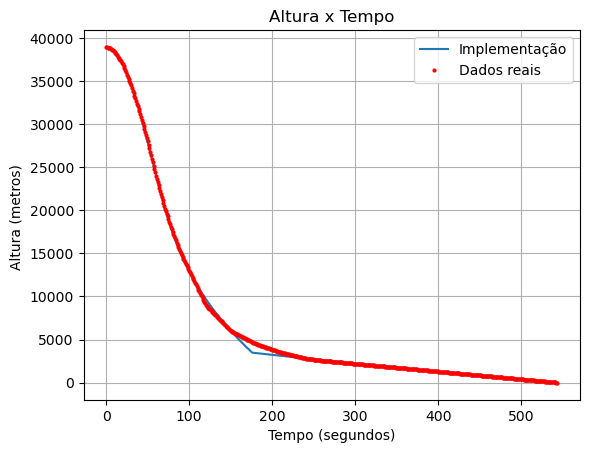

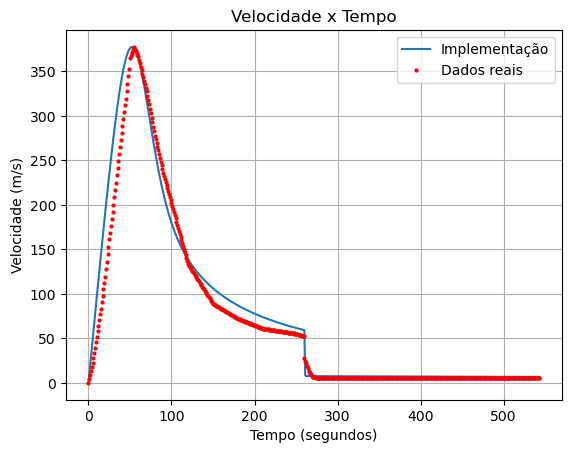

In [ ]:
plt.plot(lista_t, y_lista, label = "Implementação")
plt.plot(lista_t, lista_altura, 'ro', markersize=2, label = "Dados reais")
plt.title("Altura x Tempo")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Altura (metros) ")
plt.grid()
plt.legend()
plt.show()

plt.plot(lista_t, vy_lista, label = "Implementação")
plt.plot(lista_t, lista_velocidade, 'ro', markersize=2, label = "Dados reais")
plt.title("Velocidade x Tempo")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Velocidade (m/s)")
plt.grid()
plt.legend()
plt.show()

**Cálculo do erro percentual médio:**

In [ ]:
#Altura:
i = 0
dif = 0
while(i<len(lista_altura)-1):
    d = (lista_altura[i] - y_lista[i])/lista_altura[i]
    dif += d
    i+= 1
ea = abs((dif/len(lista_altura))*100)
print (ea)

#Velocidade:
i = 1
dif = 0
while(i<len(lista_velocidade)-1):
    d = (lista_velocidade[i] - vy_lista[i])/lista_velocidade[i]
    dif += d
    i+= 1
ev = abs((dif/len(lista_velocidade))*100)
print (ev)

6.9064240238846635
21.973942297777608


# ***Conclusões***:

**Em uma queda do espaço, qual massa mínima atinge a maior velocidade de queda possível?**

*Mudança da função Modelo*

In [ ]:
def modelo3(Y, t, mt):
    y = Y[0]
    vy = Y[1]
    if t <= 260: 
        A = 0.57     #Área de uma pessoa com os braços abertos
        Cd= 1.2      #Coeficiente de arrasto do ar para uma pessoa em queda livre
    else:            #Após a abertura do paraquedas
        A = 20       #Área do paraquedas aberto 
        Cd= 2        #Coeficiente de arrasto do ar para o paraquedas
    p = po*(e**(-y/ho))
    dydt = vy
    dvydt = (p*Cd*A*(vy**2))/(2*mt) - (G*M/((R+y)**2))
    L = [dydt, dvydt]
    return L
    

*Código para o gráfico*

In [ ]:
massa = np.arange(1,150000,10)

vm = []
for i in range(len(massa)):
    c = odeint(modelo3, Y0, lista_t, args = (massa[i],) )
    vy_lista = abs(c[:,1])
    vm.append(max(vy_lista))
    
vsuporte = vm[len(massa)-1]
v_maxima = 0.9*vsuporte

numero = 0
for i in range(len(vm)):
    if vm[i] >= v_maxima:
        numero = i
        break
massa_limite = massa[numero]

print (f"A velocidade suporte de queda de um determinado corpo adotada é de {(vsuporte):.2f} m/s")
print (f"A velocidade maxima de queda de um determinado corpo é de {(v_maxima):.2f} m/s")
print (f"A massa minima para atingir uma velocidade de queda maxima é de {(massa_limite):.2f} Kg")

A velocidade maxima de queda de um determinado corpo é de 837.23 m/s
A massa minima para atingir uma velocidade de queda maxima é de 40191.00 Kg


*Gráfico da velocidade maxima em função da massa total de um corpo*

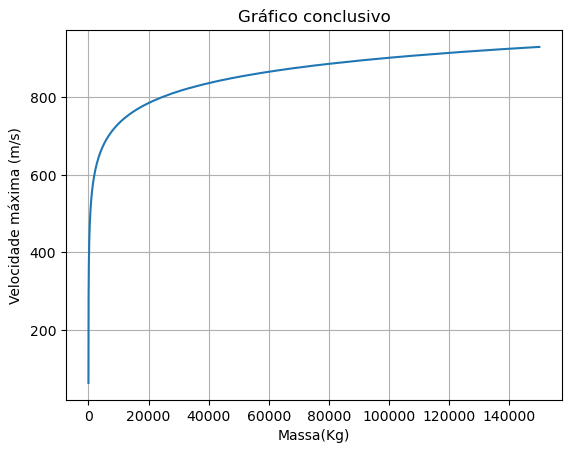

In [ ]:
plt.plot(massa, vm)
plt.title("Gráfico conclusivo")
plt.xlabel("Massa(Kg)")
plt.ylabel("Velocidade máxima (m/s)")
plt.grid()
plt.show()